In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
# Load the dataset
data=pd.read_csv("Titanic_train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(data.describe)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [7]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(data.dtypes)
print(data.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


In [9]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Display summary statistics
summary_stats = data.describe()
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


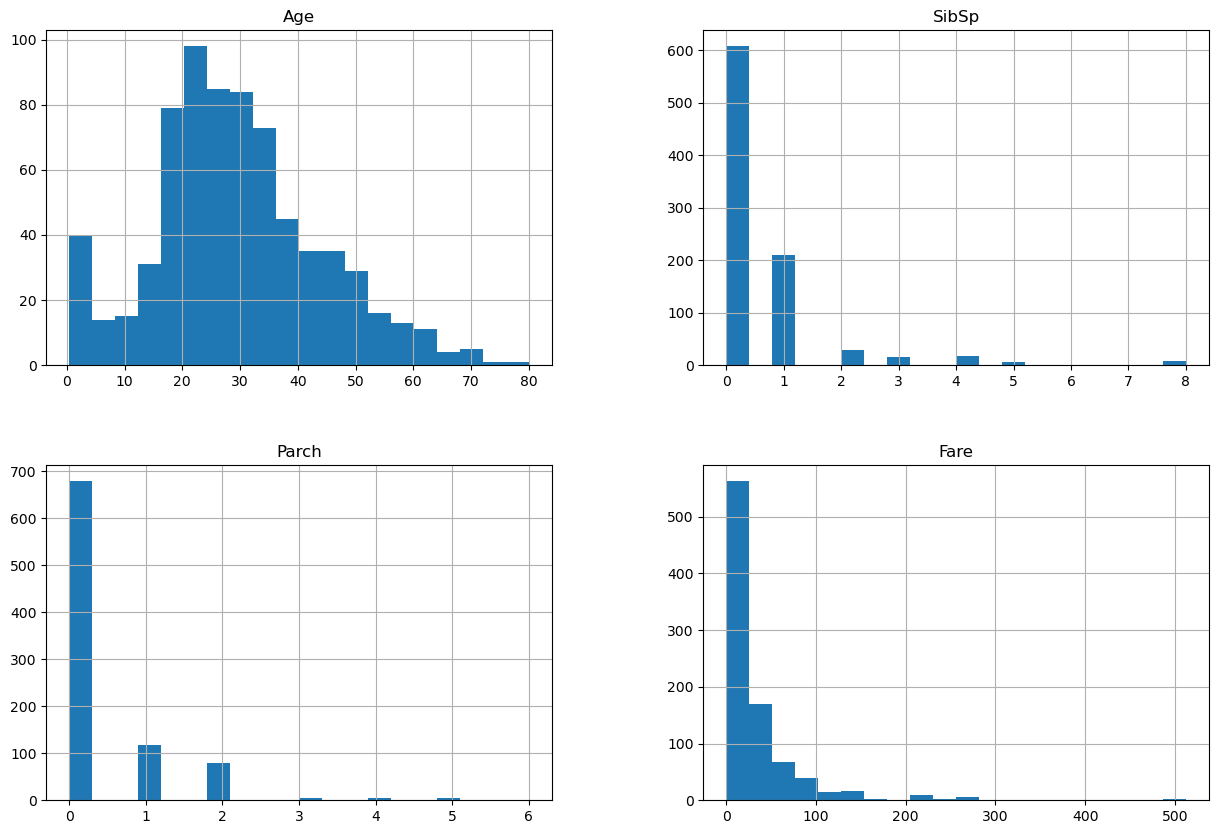

In [11]:
# Visualizations
# Histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

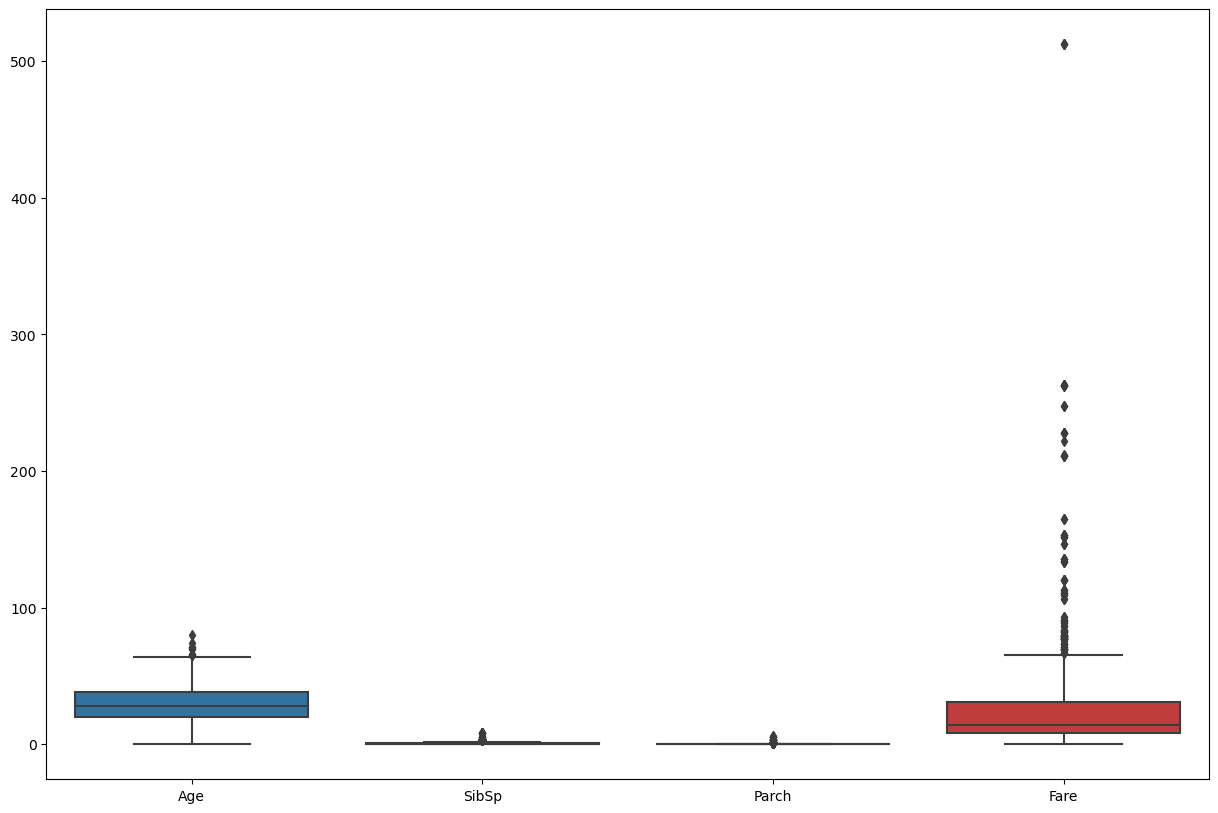

In [12]:
# Box plot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numerical_features])
plt.show()

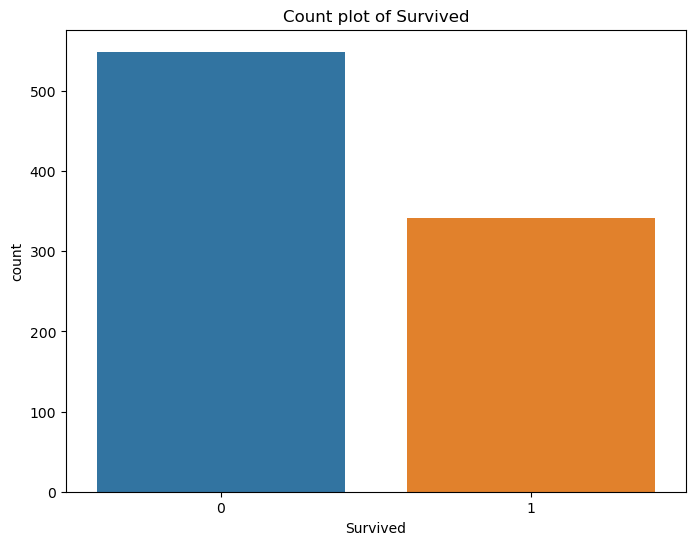

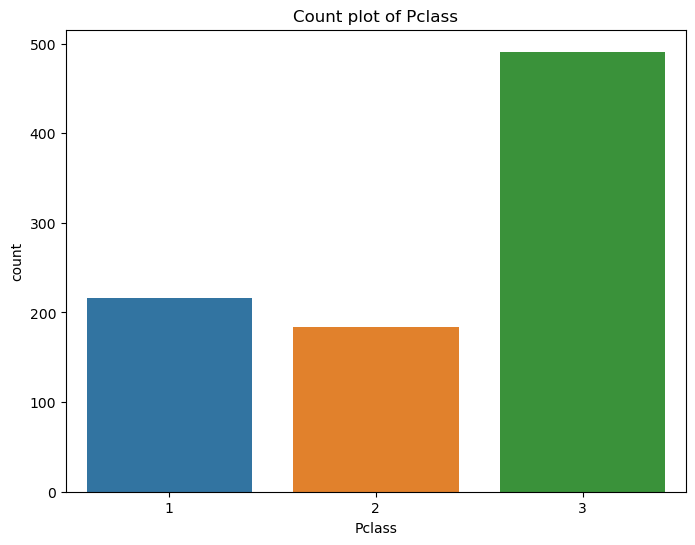

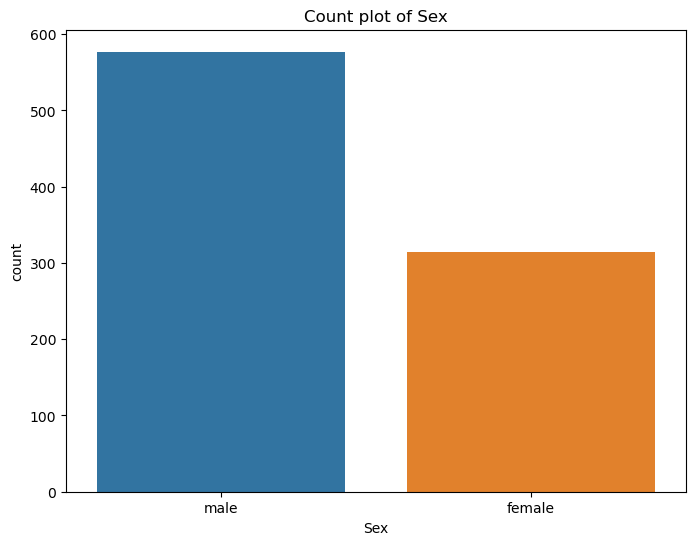

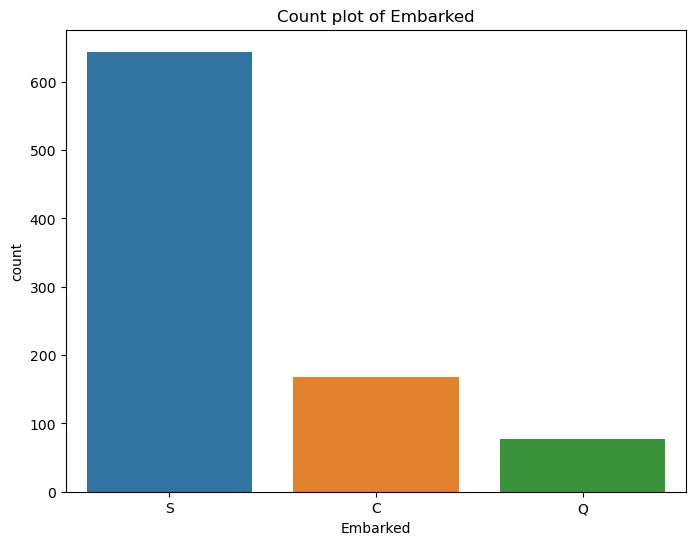

In [13]:
# Count plot for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count plot of {feature}')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


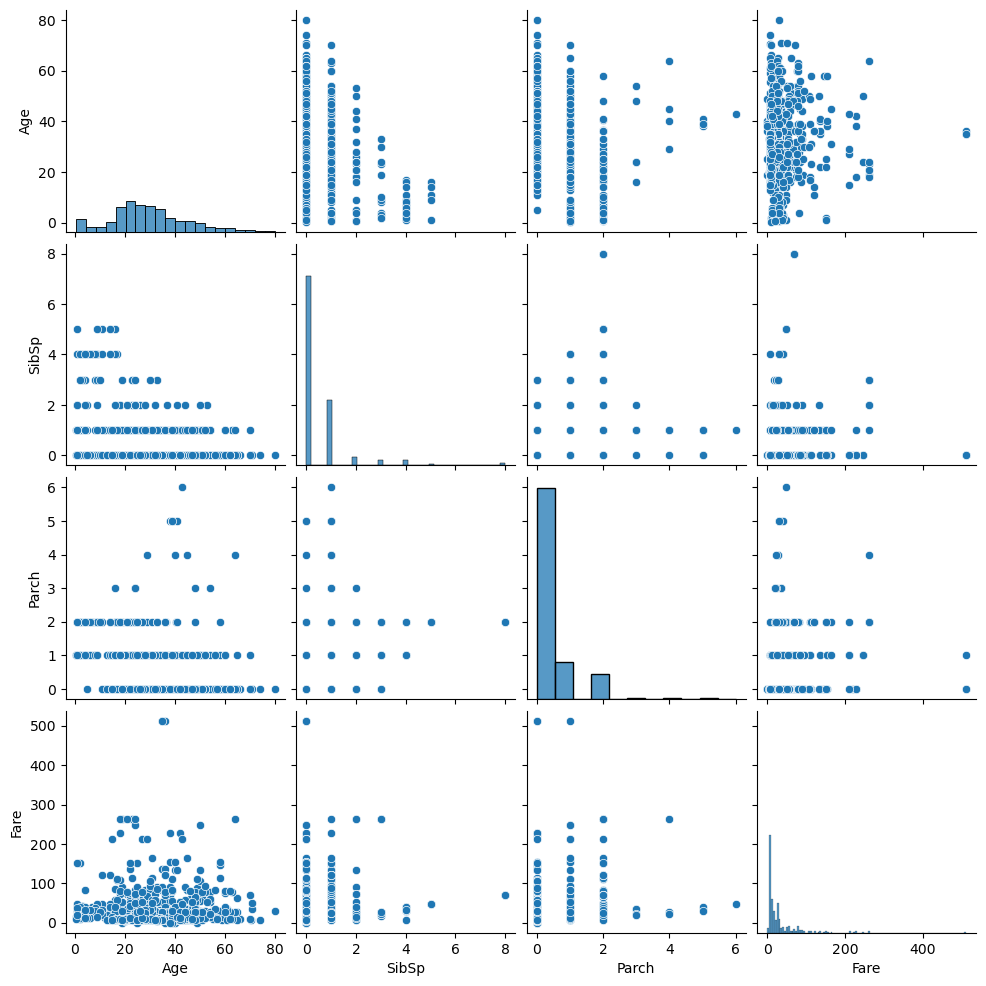

In [14]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(data[numerical_features])
plt.show()

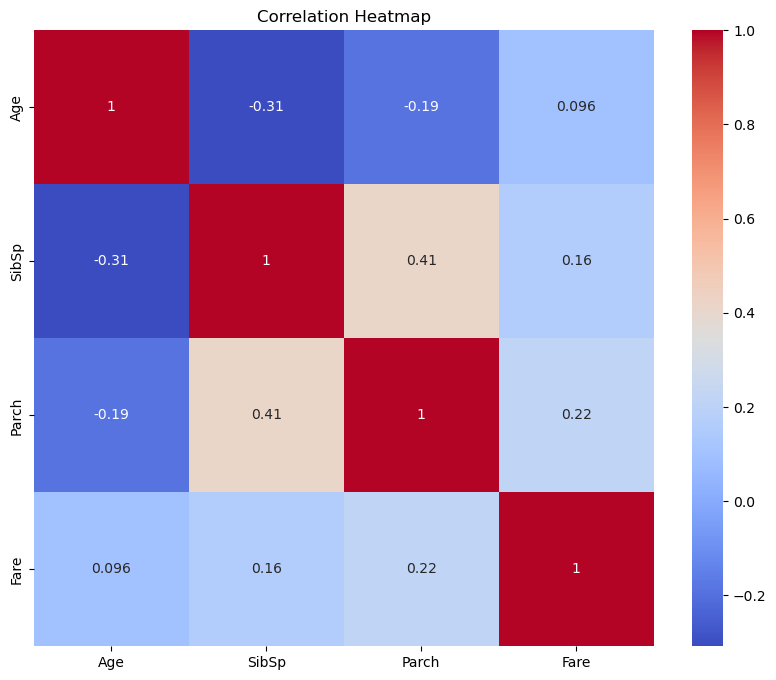

In [15]:
# Heatmap to visualize correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Handle missing values
# Impute missing values for numerical features with mean or median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [17]:
# For categorical feature 'Embarked', impute missing values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [18]:
# Drop 'Cabin' feature due to high number of missing values
data.drop('Cabin', axis=1, inplace=True)

In [19]:
# Encode categorical variables
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [20]:
# Separate features and target variable
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = data['Survived']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize logistic regression model
logreg_model = LogisticRegression()

In [23]:
# Train the model
logreg_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [26]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [27]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7886743886743887


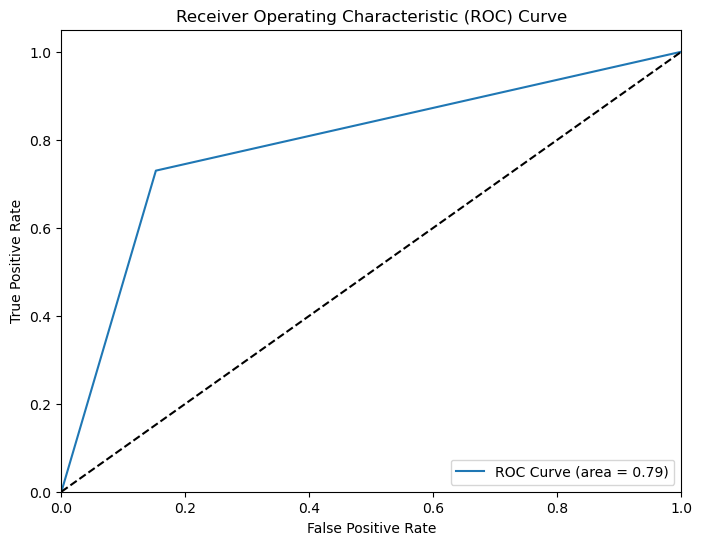

In [28]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg_model.coef_[0], index=X.columns, columns=['Coefficient'])
print("Coefficients of the logistic regression model:")
print(coefficients)

Coefficients of the logistic regression model:
            Coefficient
Pclass        -0.969533
Age           -0.030472
SibSp         -0.290181
Parch         -0.102845
Fare           0.002520
Sex_male      -2.588662
Embarked_Q     0.125960
Embarked_S    -0.330612


In [30]:
# Discussion of feature significance
# Positive coefficients indicate an increase in the odds of survival with an increase in the corresponding feature,
# while negative coefficients indicate a decrease in the odds of survival.
print("\nSignificance of features in predicting survival probability:")
print("- Features with positive coefficients have a positive impact on survival probability.")
print("- Features with negative coefficients have a negative impact on survival probability.")


Significance of features in predicting survival probability:
- Features with positive coefficients have a positive impact on survival probability.
- Features with negative coefficients have a negative impact on survival probability.


In [31]:
#""""""To run the app, navigate to the directory containing this script in your terminal and run:""""""
#  """"""streamlit run your_script_name.py""""""
#""""""Replace 'your_script_name.py' with the name of the script file containing the Streamlit app code.""""""

In [32]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to preprocess input data
def preprocess_input_data(df):
    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop('Cabin', axis=1, inplace=True)
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
    
    return df

# Function to train the model
def train_model(df):
    # Separate features and target variable
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    
    # Preprocess input data
    X = preprocess_input_data(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize logistic regression model
    logreg_model = LogisticRegression()
    
    # Train the model
    logreg_model.fit(X_train, y_train)
    
    # Evaluate the model
    accuracy = logreg_model.score(X_test, y_test)
    
    return logreg_model, accuracy

# Streamlit app
def main():
    st.title('Titanic Survival Prediction')
    
    st.sidebar.header('Training the Model')
    
    # Upload dataset
    uploaded_file = st.sidebar.file_uploader("Upload CSV file", type=["csv"])
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.sidebar.success('Dataset successfully uploaded.')
        st.sidebar.subheader('Sample of the dataset:')
        st.sidebar.write(df.head())
        
        if st.sidebar.button('Train Model'):
            try:
                model, accuracy = train_model(df)
                st.success(f'Model trained with accuracy: {accuracy:.2f}')
            except Exception as e:
                st.error(f'Error occurred while training the model: {e}')
            
            # Option to save the trained model
            if st.sidebar.button('Save Model'):
                model_path = 'trained_model.pkl'
                joblib.dump(model, model_path)
                st.success(f'Model saved as {model_path}')

    st.sidebar.header('User Input Features')
    
    # Collect user input features
    def collect_user_input():
        sex = st.sidebar.selectbox('Sex', ['male', 'female'])
        age = st.sidebar.slider('Age', 0, 100, 30)
        pclass = st.sidebar.selectbox('Pclass', [1, 2, 3])
        sibsp = st.sidebar.slider('Siblings/Spouses Aboard', 0, 10, 0)
        parch = st.sidebar.slider('Parents/Children Aboard', 0, 10, 0)
        fare = st.sidebar.slider('Fare', 0, 100, 10)
        embarked = st.sidebar.selectbox('Embarked', ['C', 'Q', 'S'])
        
        # Create a dictionary with user input
        user_input = {
            'Sex': sex,
            'Age': age,
            'Pclass': pclass,
            'SibSp': sibsp,
            'Parch': parch,
            'Fare': fare,
            'Embarked': embarked
        }
        
        return pd.DataFrame([user_input])
    
    input_df = collect_user_input()
    
    if st.sidebar.button('Predict'):
        try:
            model_path = 'trained_model.pkl'
            model = joblib.load(model_path)
            prediction = model.predict(preprocess_input_data(input_df))
            if prediction[0] == 1:
                st.success('The passenger is predicted to survive!')
            else:
                st.error('The passenger is predicted not to survive.')
            st.dataframe(input_df)
        except Exception as e:
            st.error(f'Error occurred while loading the model: {e}')

if __name__ == '__main__':
    main()


2024-04-21 20:08:04.713 
  command:

    streamlit run C:\Users\Sai Likhith\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [33]:
#""""""To run the app, navigate to the directory containing this script in your terminal and run:""""""
#  """"""streamlit run your_script_name.py""""""
#""""""Replace 'your_script_name.py' with the name of the script file containing the Streamlit app code.""""""